In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import random
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
#read the data

data_path = 'CC_GENERAL.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


In [3]:
# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# This will print basic statistics for numerical columns
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

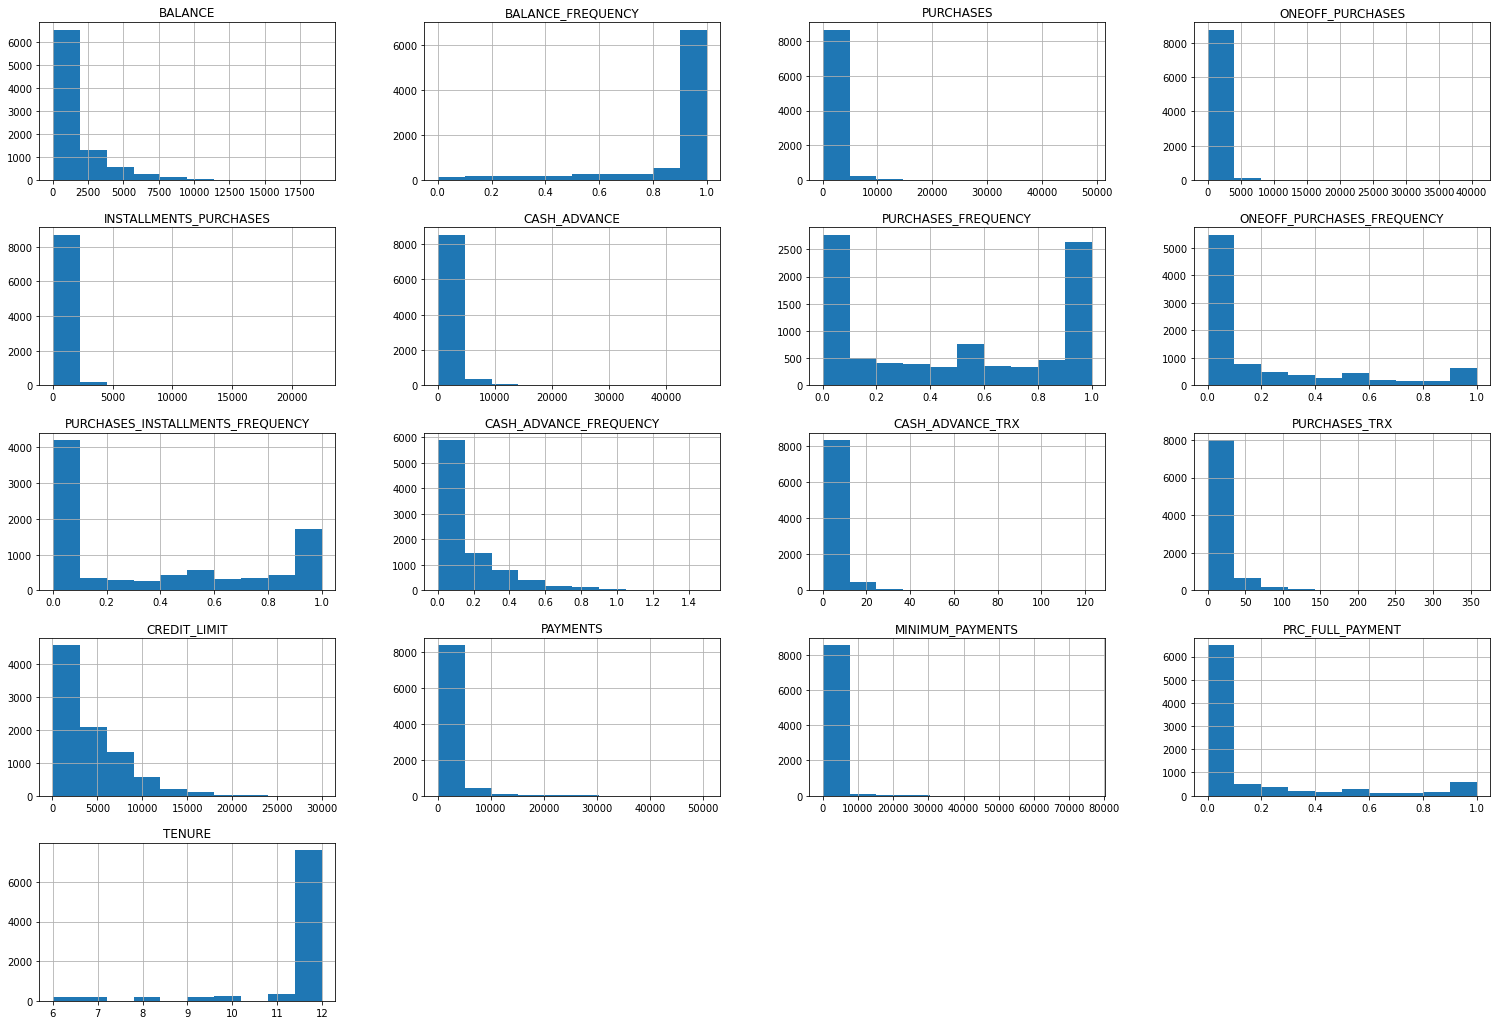

In [8]:
df.hist(figsize=(26,18));

# deal with nulls fill with average value

In [9]:
df.fillna(df.mean(), inplace=True)

In [10]:
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# drop id column

In [11]:
df.drop(columns='CUST_ID', inplace=True)

# Data is skewed apply data transformation

In [12]:
quantitative = []
for col in df.columns:
    if df[col].nunique() > 5:
        print(col, df[col].nunique())
        quantitative.append(col)
quantitative

BALANCE 8871
BALANCE_FREQUENCY 43
PURCHASES 6203
ONEOFF_PURCHASES 4014
INSTALLMENTS_PURCHASES 4452
CASH_ADVANCE 4323
PURCHASES_FREQUENCY 47
ONEOFF_PURCHASES_FREQUENCY 47
PURCHASES_INSTALLMENTS_FREQUENCY 47
CASH_ADVANCE_FREQUENCY 54
CASH_ADVANCE_TRX 65
PURCHASES_TRX 173
CREDIT_LIMIT 206
PAYMENTS 8711
MINIMUM_PAYMENTS 8637
PRC_FULL_PAYMENT 47
TENURE 7


['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [13]:
positive_skew = []
negative_skew = []
for col in quantitative:
    skeww = df[col].skew()
    if skeww > 0.7:
        positive_skew.append(col)
    elif skeww < -0.7:
        negative_skew.append(col)
print("positively skewed columns are {}".format(positive_skew))
print("negatively skewed columns are {}".format(negative_skew))

positively skewed columns are ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
negatively skewed columns are ['BALANCE_FREQUENCY', 'TENURE']


was  -2.0232655185149078


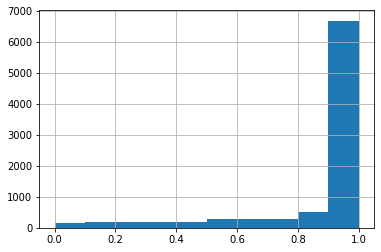

now  -1.7220430562081939


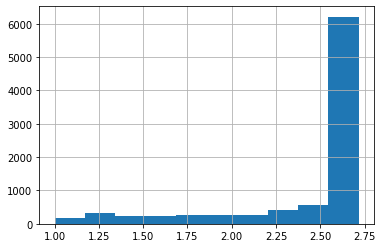

was  -2.9430172876199134


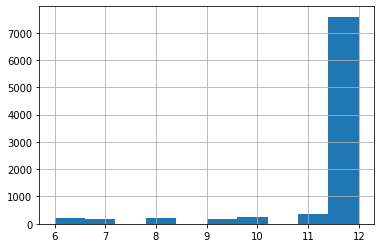

now  -2.0570914056788414


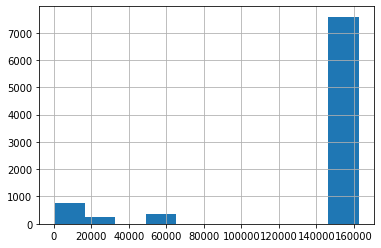

In [14]:
for col in negative_skew:
    print("was ", df[col].skew())
    df[col].hist()
    plt.show()
    new_col = np.exp(df[col])
    print("now ", new_col.skew())
    new_col.hist()
    plt.show()

was  2.393386042571806


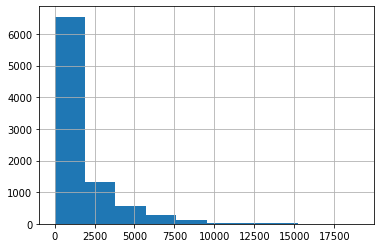

now  -0.8610205518180273


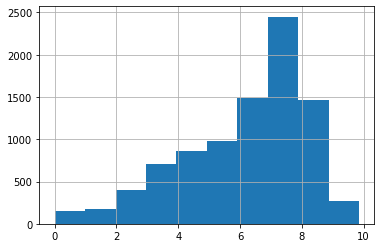

was  8.144269064554651


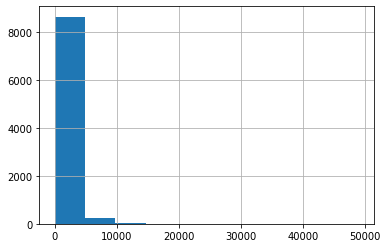

now  -0.7644920914994583


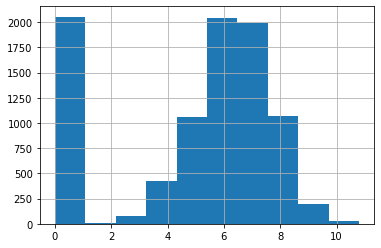

was  10.045082884700278


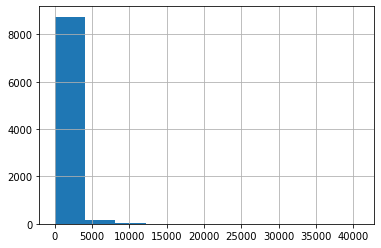

now  0.18585352201056776


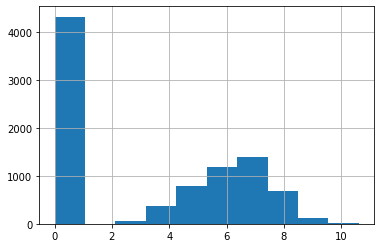

was  7.299119908745641


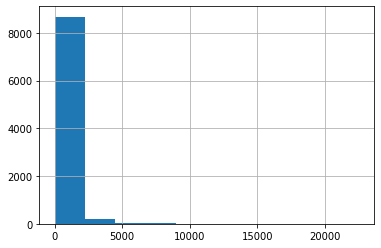

now  -0.024981407335231534


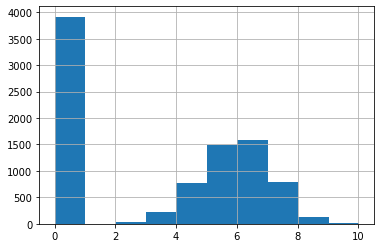

was  5.166609074074723


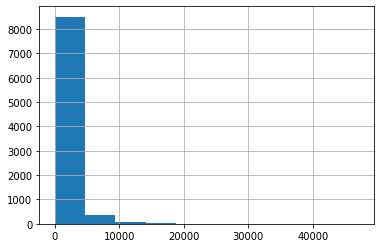

now  0.2625943575179137


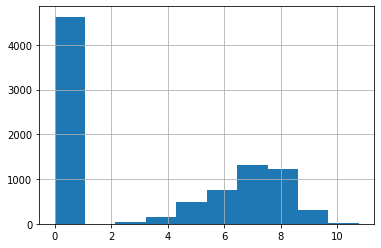

was  1.5356127835248519


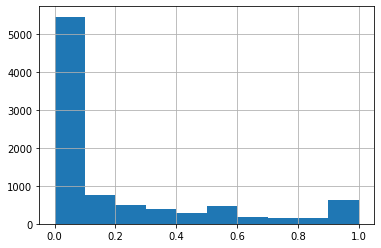

now  1.290617384929614


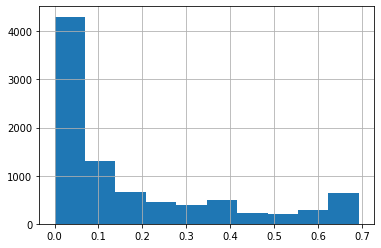

was  1.828686266477852


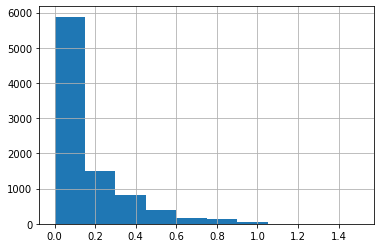

now  1.4554621403509649


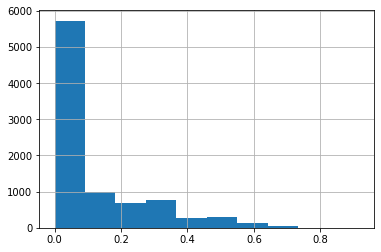

was  5.721298203192298


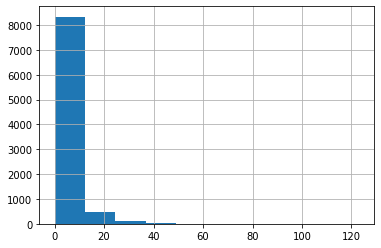

now  0.9401307113667499


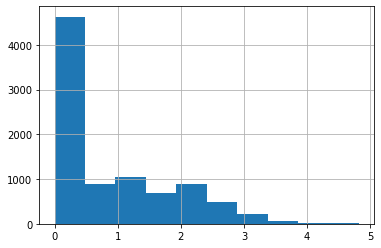

was  4.630655265932403


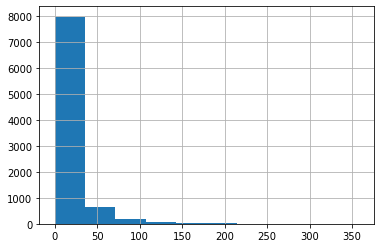

now  0.03269683973776023


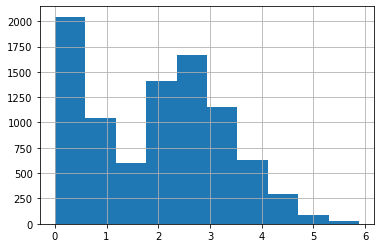

was  1.5225490377498587


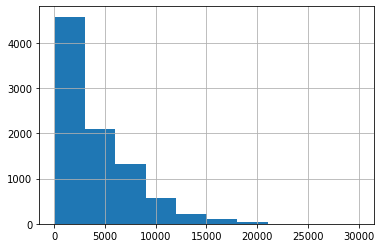

now  -0.10156412180443807


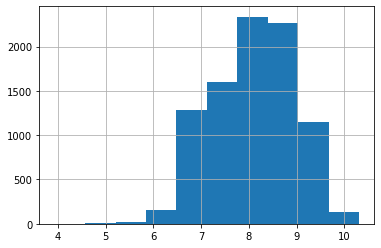

was  5.907619794397562


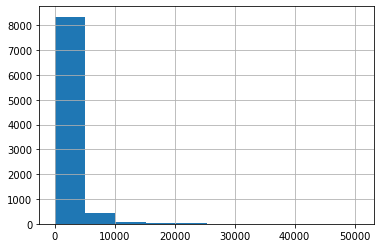

now  -1.7783116765536935


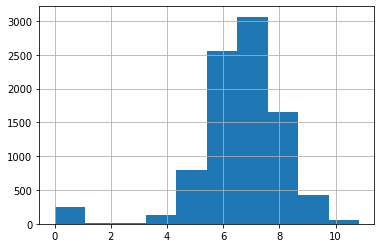

was  13.867357259762558


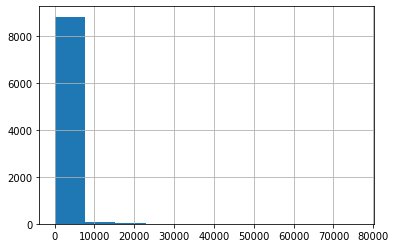

now  0.1857616660555002


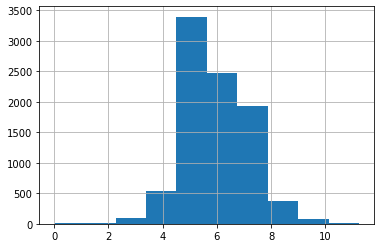

was  1.942819940971858


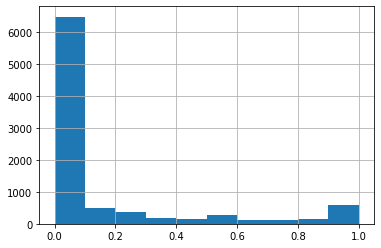

now  1.746045835389638


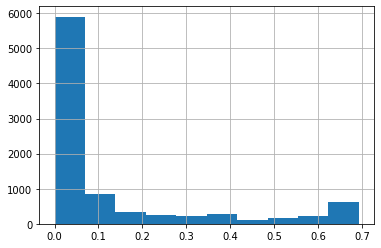

In [15]:
for col in positive_skew:
    print("was ", df[col].skew())
    df[col].hist()
    plt.show()
    new_col = np.log1p(df[col])
    print("now ", new_col.skew())
    new_col.hist()
    plt.show()

In [16]:
df[negative_skew] = np.exp(df[negative_skew])
df[positive_skew] = np.log1p(df[positive_skew])

## check outliers using percentiles and box plots


In [17]:
def plot_boxplot(df, feature):
    df.boxplot(feature)
    plt.show()

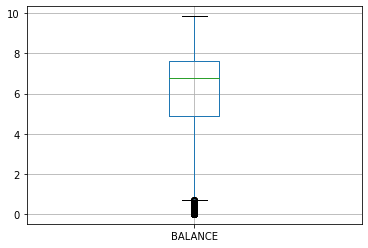

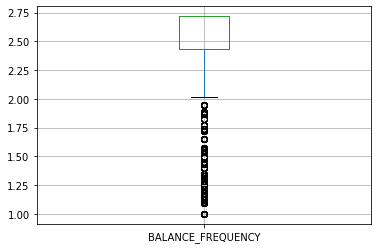

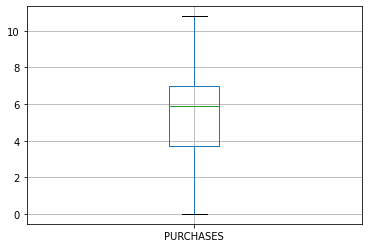

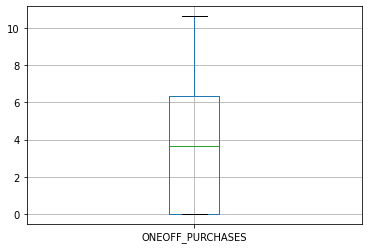

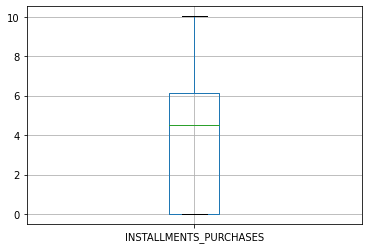

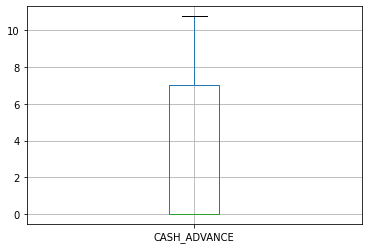

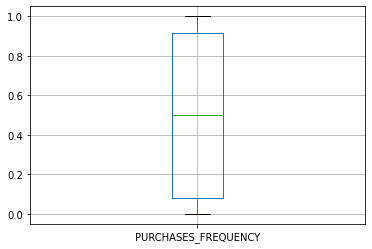

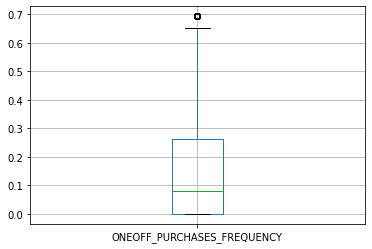

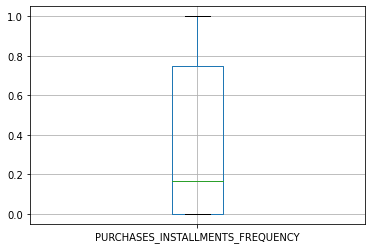

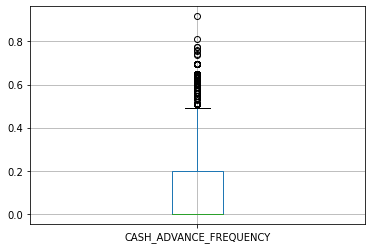

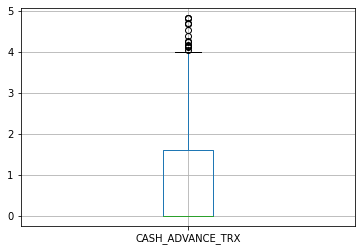

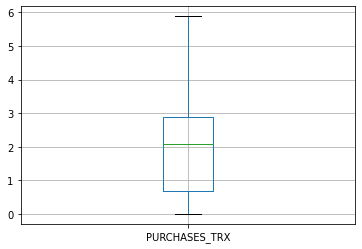

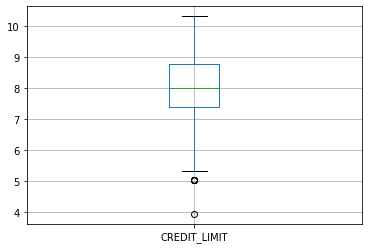

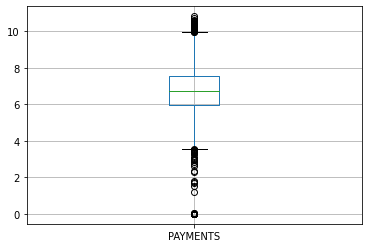

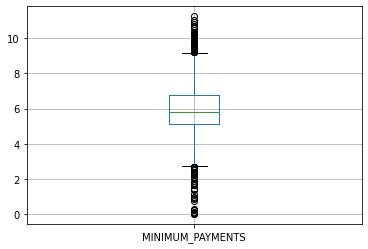

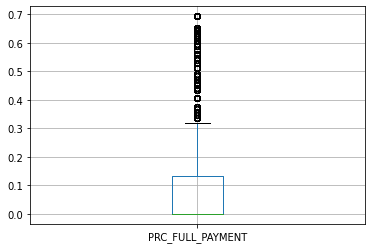

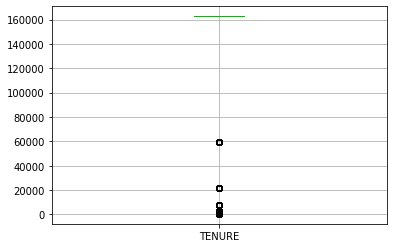

In [18]:
def list_outliers(df,feature):
    min_threshold, max_threshold = df[feature].quantile([0.5, 0.95])
    outliers = df[ (df[feature] < min_threshold) & (df[feature] > max_threshold)]
    return outliers

for feature in df.select_dtypes(exclude=['object']):
    plot_boxplot(df, feature)
    outliers = list_outliers(df, feature)
    if(len(outliers) > 0):
        print(outliers)

# normalize data using Robust scaler 

In [19]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.735304,2.266376,4.568506,0.000000,4.568506,0.000000,0.166667,0.000000,0.083333,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,162754.791419
1,8.071989,2.482065,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,162754.791419
2,7.822504,2.718282,6.651791,6.651791,0.000000,0.000000,1.000000,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,162754.791419
3,7.419183,1.889598,7.313220,7.313220,0.000000,5.331694,0.083333,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,0.000000,6.762968,0.000000,162754.791419
4,6.707735,2.718282,2.833213,2.833213,0.000000,0.000000,0.083333,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,162754.791419


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   float64
 11  PURCHASES_TRX                     8950 non-null   float64
 12  CREDIT

In [21]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler()
transformer.fit(df)
df_scaled = transformer.transform(df)

In [22]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.735304,2.266376,4.568506,0.000000,4.568506,0.000000,0.166667,0.000000,0.083333,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,162754.791419
1,8.071989,2.482065,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,162754.791419
2,7.822504,2.718282,6.651791,6.651791,0.000000,0.000000,1.000000,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,162754.791419
3,7.419183,1.889598,7.313220,7.313220,0.000000,5.331694,0.083333,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,0.000000,6.762968,0.000000,162754.791419
4,6.707735,2.718282,2.833213,2.833213,0.000000,0.000000,0.083333,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,162754.791419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,3.384170,2.718282,5.677165,0.000000,5.677165,0.000000,1.000000,0.000000,0.833333,0.000000,0.000000,1.945910,6.908755,5.788719,3.909748,0.405465,403.428793
8946,3.004851,2.718282,5.707110,0.000000,5.707110,0.000000,1.000000,0.000000,0.833333,0.000000,0.000000,1.945910,6.908755,5.623517,6.762968,0.000000,403.428793
8947,3.194529,2.300975,4.979489,0.000000,4.979489,0.000000,0.833333,0.000000,0.666667,0.000000,0.000000,1.791759,6.908755,4.410016,4.423869,0.223144,403.428793
8948,2.671218,2.300975,0.000000,0.000000,0.000000,3.625907,0.000000,0.000000,0.000000,0.154151,1.098612,0.000000,6.216606,3.980615,4.038755,0.223144,403.428793


In [23]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [24]:
df_scaled

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.205218,-0.423694,-0.113532,-0.987090,0.394480,-0.930733,-0.806490,-0.732480,-0.707313,-0.724360,-0.810069,-0.579510,-1.447207,-0.824484,-0.853119,-0.556368,0.417185
1,0.948918,0.041807,-1.679855,-0.987090,-1.087454,1.528788,-1.221758,-0.732480,-0.916995,0.699592,0.784603,-1.379210,0.925998,1.065033,0.870592,0.391958,0.417185
2,0.824993,0.551608,0.600727,1.062022,-1.087454,-0.930733,1.269843,2.466762,-0.916995,-0.724360,-0.810069,0.487865,1.010166,-0.119300,0.416585,-0.556368,0.417185
3,0.624653,-1.236854,0.827499,1.265778,-1.087454,0.564372,-1.014125,-0.363042,-0.916995,-0.213583,-0.123281,-0.874655,1.010166,-4.161996,0.687847,-0.556368,0.417185
4,0.271260,0.551608,-0.708481,-0.114307,-1.087454,-0.930733,-1.014125,-0.363042,-0.916995,-0.724360,-0.810069,-0.874655,-1.224955,-0.064979,-0.379047,-0.556368,0.417185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-1.379634,0.551608,0.266574,-0.987090,0.754107,-0.930733,1.269843,-0.732480,1.179833,-0.724360,-0.810069,0.037255,-1.447207,-0.525121,-1.731000,1.359774,-2.724049
8946,-1.568051,0.551608,0.276841,-0.987090,0.763821,-0.930733,1.269843,-0.732480,1.179833,-0.724360,-0.810069,0.037255,-1.447207,-0.628912,0.687847,-0.556368,-2.724049
8947,-1.473834,-0.349022,0.027374,-0.987090,0.527794,-0.930733,0.854576,-0.732480,0.760469,-0.724360,-0.810069,-0.074955,-1.447207,-1.391318,-1.295149,0.498161,-2.724049
8948,-1.733775,-0.349022,-1.679855,-0.987090,-1.087454,0.086038,-1.221758,-0.732480,-0.916995,0.259328,0.278464,-1.379210,-2.291713,-1.661097,-1.621633,0.498161,-2.724049


# Features Correlation

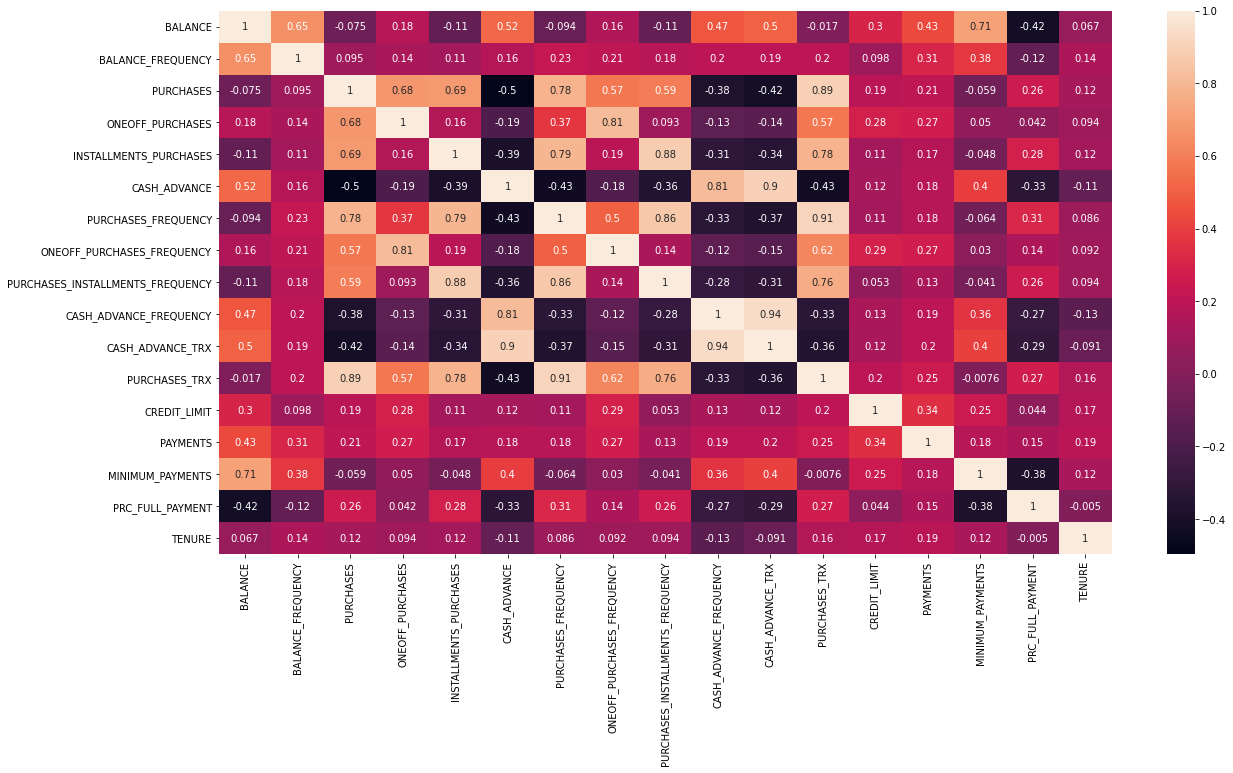

In [25]:
f, ax = plt.subplots(figsize = (20,10))
sns.heatmap(df.corr(), annot= True);

# Kernel PCA vs PCA

In [26]:
from sklearn.decomposition import PCA, KernelPCA


In [27]:
pca = PCA(n_components=2)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

In [28]:
kernelpca = KernelPCA(n_components=2, kernel='rbf')
kernelpca.fit(df_scaled)
df_kernelpca = kernelpca.transform(df_scaled)

In [29]:
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca.head()

,PCA1,PCA2
0,-0.292699,-2.764946
1,-3.426726,0.969491
2,1.528018,1.304514
3,-1.360914,-0.869044
4,-1.124017,-1.336185


In [30]:
df_kernelpca =  pd.DataFrame(df_kernelpca, columns=['PCA1', 'PCA2'])
df_kernelpca.head()

,PCA1,PCA2
0,-0.022886,0.494300
1,0.609585,-0.082993
2,-0.205137,-0.273433
3,0.060632,0.029027
4,0.205737,0.268408


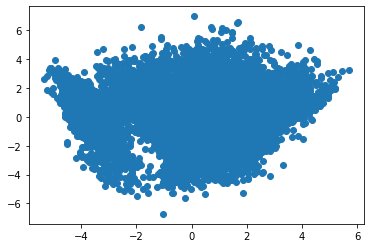

In [31]:
plt.scatter(x = df_pca['PCA1'], y= df_pca['PCA2'])

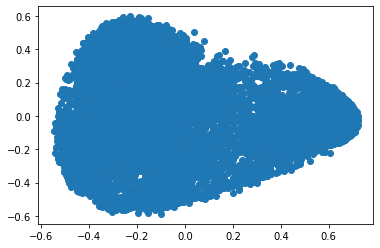

In [32]:
plt.scatter(x = df_kernelpca['PCA1'], y= df_kernelpca['PCA2'])

- **PCA** is a linear method. 
- It works great for linearly separable datasets. 
- However, if the dataset has non-linear relationships, 
- Then we should use Kernel PCA

- **Kernel PCA** is a technique which uses the kernel trick 
- and projects the linearly inseparable data into a higher dimension 
- where it is linearly separable.


### Silhouette Score 
it is a metric to evaluate the performance of clustering algorithm. It uses compactness of individual clusters(intra cluster distance) and separation amongst clusters (inter cluster distance) to measure an overall representative score of how well our clustering algorithm has performed.\
**but As a rule of thumb** whenever using Density based clustering algorithms silhouette distance may not be an appropriate metric.

# Kmeans
# FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [34]:
scores_inertia = []
scores_silhouette = []
for i in range(2,20):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_scaled)
    scores_inertia.append(kmeans.inertia_)
    sil_score = silhouette_score(df_scaled, kmeans.labels_)
    scores_silhouette.append(sil_score)

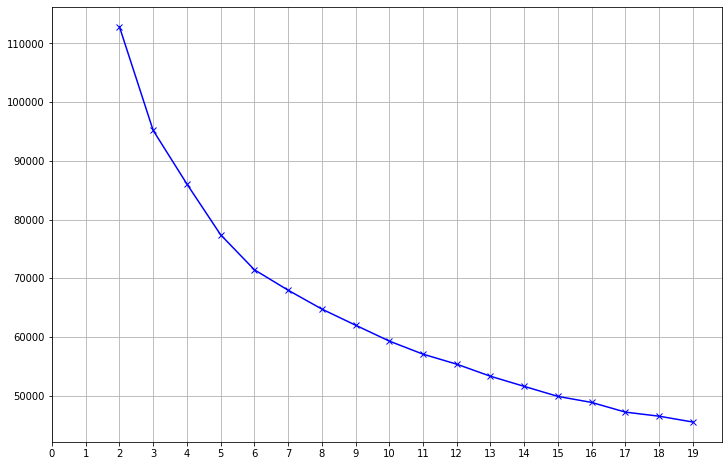

In [35]:
fig = plt.figure(figsize= (12,8)) 
ax = fig.add_subplot()
plt.plot(range(2,20),scores_inertia, 'bx-')
ax.set_xticks(np.arange(0, 20, 1))
plt.grid(True)
plt.show()

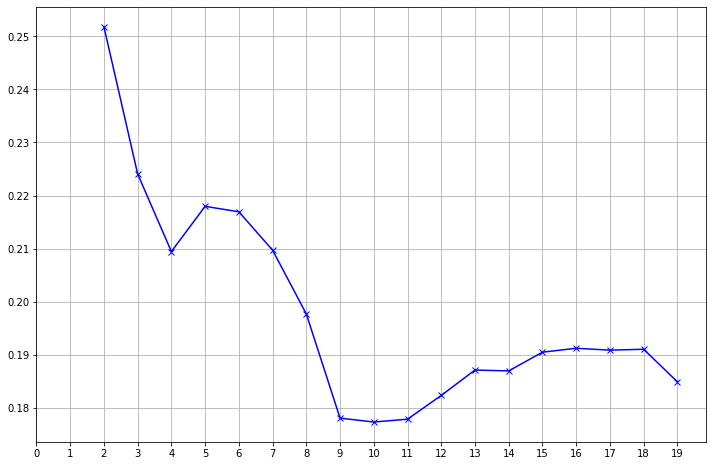

In [36]:
fig = plt.figure(figsize= (12,8)) 
ax = fig.add_subplot()
plt.plot(range(2,20),scores_silhouette, 'bx-')
ax.set_xticks(np.arange(0, 20, 1))
plt.grid(True)
plt.show()

# 4 or 6 clusters seems a good number of clusters

# apply K-MEANS with 6 clusters and analyze

In [37]:
kmeans = KMeans(6)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [38]:
kmeans.cluster_centers_.shape #centroid for clusters

(6, 17)

## clusters centers

In [39]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.569649,0.208942,-1.469991,-0.835761,-1.047100,1.024500,-1.179320,-0.681375,-0.906027,0.835849,0.915753,-1.286934,-0.074565,0.059722,0.339694,-0.423028,-0.125005
1,-0.613197,0.198614,0.440886,-0.722587,0.899629,-0.804580,0.911007,-0.630856,1.130116,-0.667864,-0.732702,0.534769,-0.469379,-0.227478,-0.426072,0.616400,-0.031170
2,0.826846,0.421366,0.631203,0.537612,0.493559,1.169446,0.513420,0.379959,0.378566,1.202089,1.263345,0.631902,0.436148,0.531581,0.821354,-0.398497,-0.026470
3,0.192492,0.421845,0.982779,1.212977,0.842646,-0.743013,1.078481,1.488307,0.762935,-0.648099,-0.705277,1.226845,0.668821,0.622909,-0.062262,0.512029,0.307965
4,-1.719440,-2.152521,-0.136963,-0.289439,-0.218037,-0.627224,-0.533954,-0.443316,-0.427352,-0.594389,-0.629926,-0.426392,-0.256769,-0.946808,-0.940395,0.226176,-0.178687
5,0.193636,0.293817,0.347554,0.658570,-0.548029,-0.510411,-0.364494,0.271177,-0.693992,-0.523014,-0.543929,-0.095231,-0.237017,-0.234282,0.003556,-0.400376,0.078820


In [40]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = transformer.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,7.308450,2.559507,0.612112,0.491241,0.124402,6.972555,0.017032,0.011072,0.004359,0.244496,1.741803,0.126767,8.033757,6.719598,6.352295,0.028215,134732.297436
1,4.927154,2.554722,6.185584,0.858624,6.125780,0.449873,0.855982,0.022018,0.813575,0.008853,0.078084,2.629386,7.710172,6.262469,5.449013,0.248164,139582.032532
2,7.826235,2.657934,6.740681,4.949463,4.873949,7.489445,0.696411,0.241021,0.514889,0.301888,2.092613,2.762825,8.452332,7.470644,6.920450,0.033406,139824.966618
3,6.549160,2.658156,7.766128,7.141821,5.950114,0.669428,0.923197,0.481155,0.667647,0.011951,0.105762,3.580145,8.643029,7.616008,5.878156,0.226078,157109.896962
4,2.700078,1.465324,4.500167,2.264701,2.680238,1.082344,0.276049,0.062650,0.194597,0.020367,0.181811,1.308963,7.884425,5.117531,4.842329,0.165590,131957.803997
5,6.551463,2.598834,5.913360,5.342114,1.662939,1.498911,0.344062,0.217452,0.088627,0.031552,0.268605,1.763904,7.900613,6.251640,5.955793,0.033009,145266.736155


In [41]:
# concatenate the clusters labels to our original dataframe
df_cluster = df.copy()
df_cluster['label'] = labels
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,label
0,3.735304,2.266376,4.568506,0.000000,4.568506,0.000000,0.166667,0.000000,0.083333,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,162754.791419,4
1,8.071989,2.482065,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,162754.791419,0
2,7.822504,2.718282,6.651791,6.651791,0.000000,0.000000,1.000000,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,162754.791419,3
3,7.419183,1.889598,7.313220,7.313220,0.000000,5.331694,0.083333,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,0.000000,6.762968,0.000000,162754.791419,5
4,6.707735,2.718282,2.833213,2.833213,0.000000,0.000000,0.083333,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,162754.791419,5


# APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

In [42]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_scaled) 

In [43]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['feature1','feature2'])
pca_df.head()

,feature1,feature2
0,-0.292699,-2.764945
1,-3.426726,0.969491
2,1.528018,1.304514
3,-1.360914,-0.869046
4,-1.124017,-1.336185


In [44]:
pca_df['label'] = labels
pca_df.head()

,feature1,feature2,label
0,-0.292699,-2.764945,4
1,-3.426726,0.969491,0
2,1.528018,1.304514,3
3,-1.360914,-0.869046,5
4,-1.124017,-1.336185,5


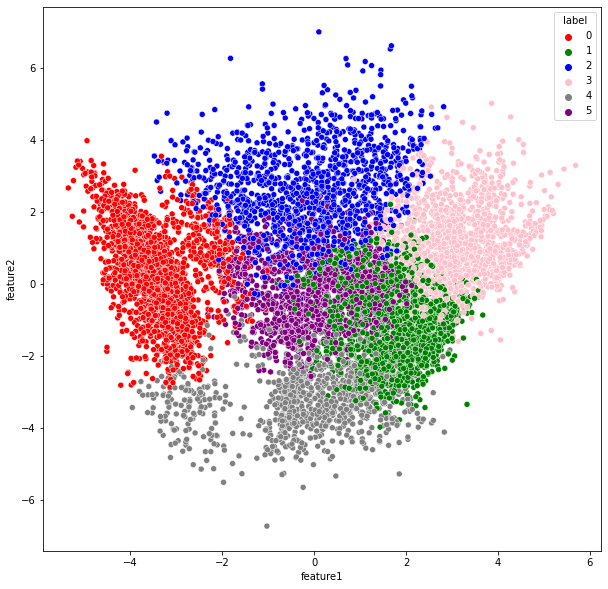

In [45]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="feature1", y="feature2", hue = "label", data = pca_df, palette =['red','green','blue','pink','gray','purple'])
plt.show()

In [46]:
# Obtain the principal components 
pca = KernelPCA(n_components=2, kernel='poly')
principal_comp = pca.fit_transform(df_scaled) 

In [47]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['feature1','feature2'])
pca_df.head()

,feature1,feature2
0,-0.051860,1.108306
1,1.796120,-0.498794
2,-0.789942,-0.518192
3,0.370752,0.882960
4,0.289694,0.480873


In [48]:
pca_df['label'] = labels
pca_df.head()

,feature1,feature2,label
0,-0.051860,1.108306,4
1,1.796120,-0.498794,0
2,-0.789942,-0.518192,3
3,0.370752,0.882960,5
4,0.289694,0.480873,5


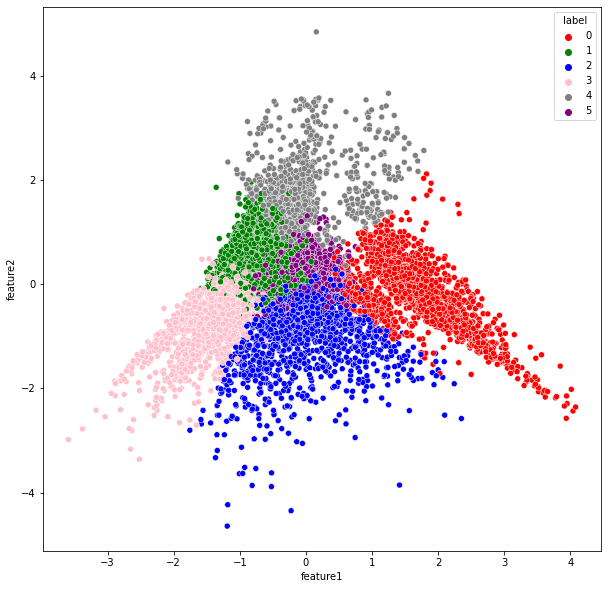

In [49]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="feature1", y="feature2", hue = "label", data = pca_df, palette =['red','green','blue','pink','gray','purple'])
plt.show()

# kmeans clustering visualization with different number of clusters

In [50]:
def kmeans_pca_vis(k):
    kmeans = KMeans(k)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    
    cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
    cluster_centers = transformer.inverse_transform(cluster_centers)
    cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
    
    # concatenate the clusters labels to our original dataframe
    df_cluster = df.copy()
    df_cluster['label'] = labels
    
    # Obtain the principal components 
    pca = PCA(n_components=2)
    principal_comp = pca.fit_transform(df_scaled) 
    
    # Create a dataframe with the two components
    pca_df = pd.DataFrame(data = principal_comp, columns =['feature1','feature2'])
    pca_df['label'] = labels
    
    plt.figure(figsize=(10,10))
    colors = ['red','green','blue','black','gray','purple', 'yellow', 'pink']
    ax = sns.scatterplot(x="feature1", y="feature2", hue = "label", data = pca_df, palette =colors[:k])
    plt.show()
    return df_cluster, cluster_centers, pca_df

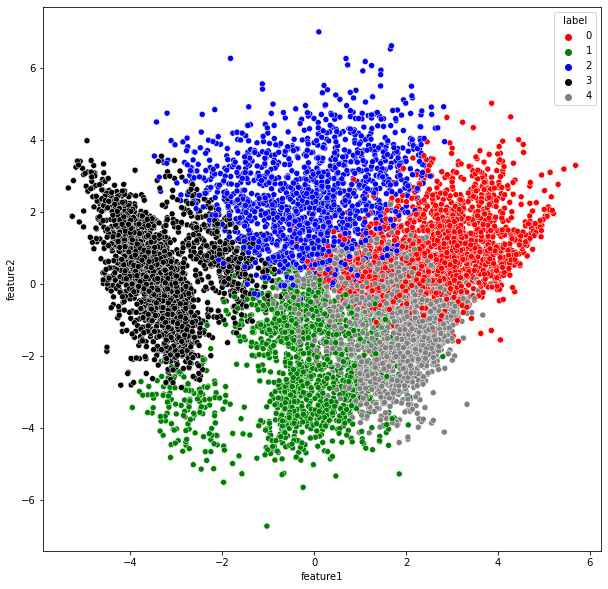

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,6.594887,2.659160,7.507962,6.984807,5.072645,0.551345,0.840086,0.454569,0.540565,0.009752,0.086602,3.310316,8.507400,7.397688,5.922144,0.184615,155769.990102
1,3.993461,1.842071,4.806061,3.568002,1.724852,1.046879,0.214110,0.104545,0.092946,0.020528,0.173489,1.235534,7.887043,5.361496,5.145030,0.107492,133816.597444
2,7.746770,2.658470,6.732365,5.055982,4.656352,7.320400,0.675229,0.242259,0.486699,0.281368,1.978223,2.720647,8.390132,7.379003,6.846578,0.031766,140396.397534
3,7.319606,2.569235,0.838502,0.706822,0.136612,6.868741,0.022846,0.016092,0.004840,0.237683,1.702230,0.175299,8.023736,6.687194,6.364236,0.027428,135530.909924
4,4.811692,2.486650,6.071882,0.825264,6.013916,0.395514,0.812753,0.020531,0.769835,0.007808,0.068230,2.545500,7.711125,6.217291,5.429467,0.239158,140299.654736


In [51]:
df_cluster, cluster_centers , pca_df= kmeans_pca_vis(5)
cluster_centers

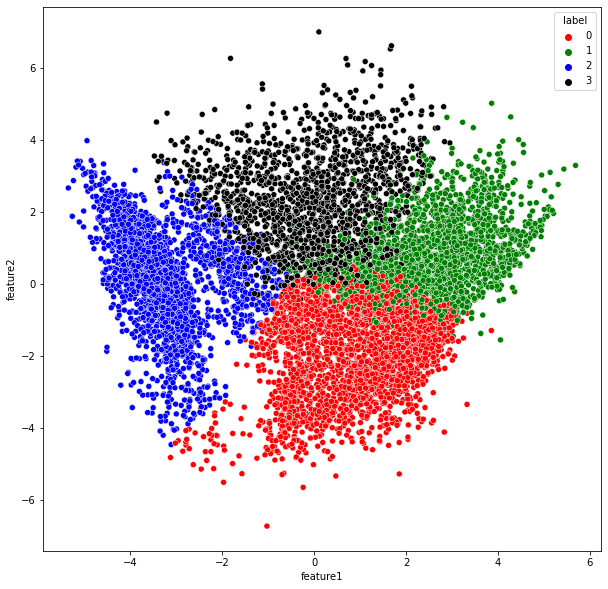

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4.170631,2.164036,5.578037,1.994157,4.149728,0.311247,0.536720,0.056260,0.455485,0.006273,0.051514,1.948688,7.781620,5.766990,5.155247,0.192202,137258.914618
1,6.583551,2.662980,7.415991,6.449560,5.166332,0.503583,0.842738,0.405215,0.575616,0.008837,0.078064,3.253538,8.450576,7.342385,5.992458,0.181873,155898.574295
2,7.117768,2.511344,0.915570,0.790054,0.130104,6.751790,0.025386,0.018337,0.005015,0.226983,1.638146,0.189299,7.989197,6.539282,6.292826,0.029698,133586.501429
3,7.704965,2.656628,6.692241,4.877881,4.651077,7.268842,0.677162,0.233511,0.492625,0.275441,1.945698,2.703645,8.352141,7.353800,6.821368,0.033020,140269.541554


In [52]:
df_cluster, cluster_centers, pca_df = kmeans_pca_vis(4)
cluster_centers

# segments insights

## 4 clusters

In [53]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4.170631,2.164036,5.578037,1.994157,4.149728,0.311247,0.536720,0.056260,0.455485,0.006273,0.051514,1.948688,7.781620,5.766990,5.155247,0.192202,137258.914618
1,6.583551,2.662980,7.415991,6.449560,5.166332,0.503583,0.842738,0.405215,0.575616,0.008837,0.078064,3.253538,8.450576,7.342385,5.992458,0.181873,155898.574295
2,7.117768,2.511344,0.915570,0.790054,0.130104,6.751790,0.025386,0.018337,0.005015,0.226983,1.638146,0.189299,7.989197,6.539282,6.292826,0.029698,133586.501429
3,7.704965,2.656628,6.692241,4.877881,4.651077,7.268842,0.677162,0.233511,0.492625,0.275441,1.945698,2.703645,8.352141,7.353800,6.821368,0.033020,140269.541554


In [54]:
#info
"""If you pay your balance in full every month, your interest rate is irrelevant, 
because you don't get charged interest at all.
so high percentage of full payment means less interest rate"""

"""A cash advance on your credit card is an amount of cash borrowed against your credit limit. 
It's like withdrawing money from the ATM with your debit card, 
except the cash comes from your credit limit rather than your bank account balance.
That means you have to pay it back with interest."""


# segment 1 high balance, high purchase freq 
    #low cash advance, high percentage of full payment (this means low interest)
    
# segment 2 high balance,low purchase freq
    #high cash advance, low perc of full payment (good for the bank -> target to buy more)
    
# segment 3 low balance, high purchase freq, low cash in advance 
    #low cash advance, medium percentage of full payment (pays interest)
    
#segment 4 low balance, low purchase, low cash advance (not active)


"A cash advance on your credit card is an amount of cash borrowed against your credit limit. \nIt's like withdrawing money from the ATM with your debit card, \nexcept the cash comes from your credit limit rather than your bank account balance.\nThat means you have to pay it back with interest."

In [55]:
df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,label
0,3.735304,2.266376,4.568506,0.000000,4.568506,0.000000,0.166667,0.000000,0.083333,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,162754.791419,0
1,8.071989,2.482065,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,162754.791419,2
2,7.822504,2.718282,6.651791,6.651791,0.000000,0.000000,1.000000,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,162754.791419,1
3,7.419183,1.889598,7.313220,7.313220,0.000000,5.331694,0.083333,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,0.000000,6.762968,0.000000,162754.791419,2
4,6.707735,2.718282,2.833213,2.833213,0.000000,0.000000,0.083333,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,162754.791419,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,3.384170,2.718282,5.677165,0.000000,5.677165,0.000000,1.000000,0.000000,0.833333,0.000000,0.000000,1.945910,6.908755,5.788719,3.909748,0.405465,403.428793,0
8946,3.004851,2.718282,5.707110,0.000000,5.707110,0.000000,1.000000,0.000000,0.833333,0.000000,0.000000,1.945910,6.908755,5.623517,6.762968,0.000000,403.428793,0
8947,3.194529,2.300975,4.979489,0.000000,4.979489,0.000000,0.833333,0.000000,0.666667,0.000000,0.000000,1.791759,6.908755,4.410016,4.423869,0.223144,403.428793,0
8948,2.671218,2.300975,0.000000,0.000000,0.000000,3.625907,0.000000,0.000000,0.000000,0.154151,1.098612,0.000000,6.216606,3.980615,4.038755,0.223144,403.428793,2


# visualize some features

In [56]:
def scatter_plot(df, x, y):
    plt.figure(figsize=(14,8))
    X= x.upper()
    Y= y.upper()
    for cluster in range(4):
        plt.scatter(df[df['label']==cluster][X], df[df['label']==cluster][Y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'{x} vs {y}')

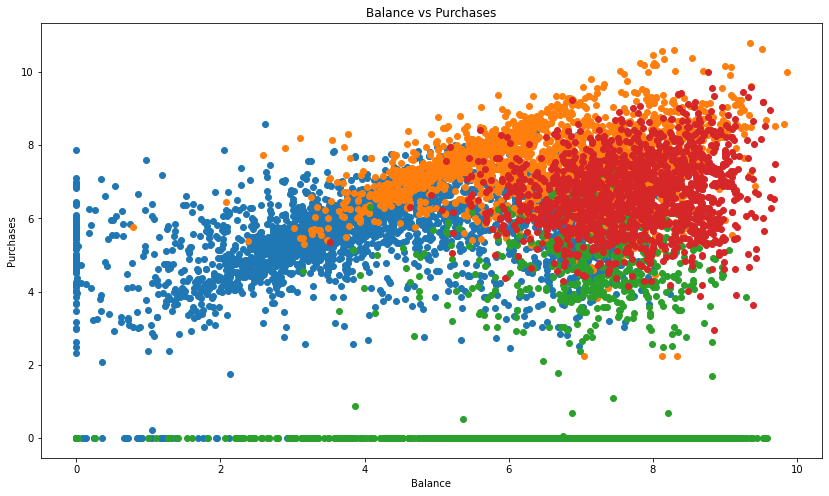

In [57]:
scatter_plot(df_cluster, "Balance", "Purchases")

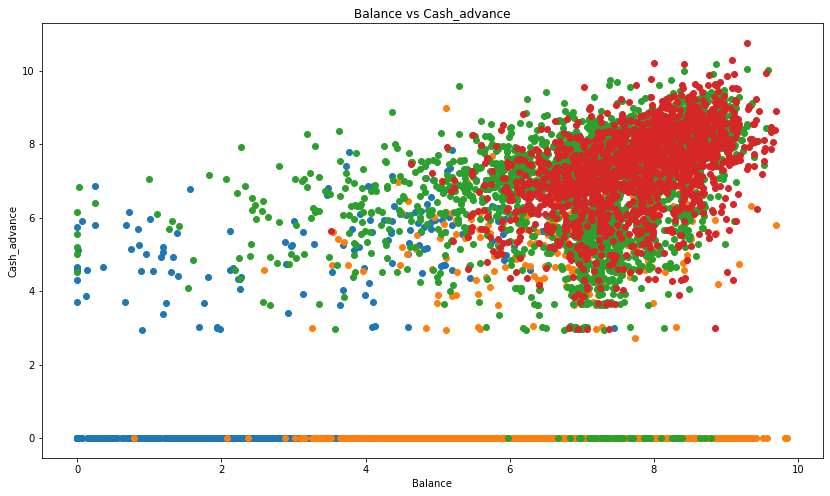

In [58]:
scatter_plot(df_cluster, "Balance", "Cash_advance")

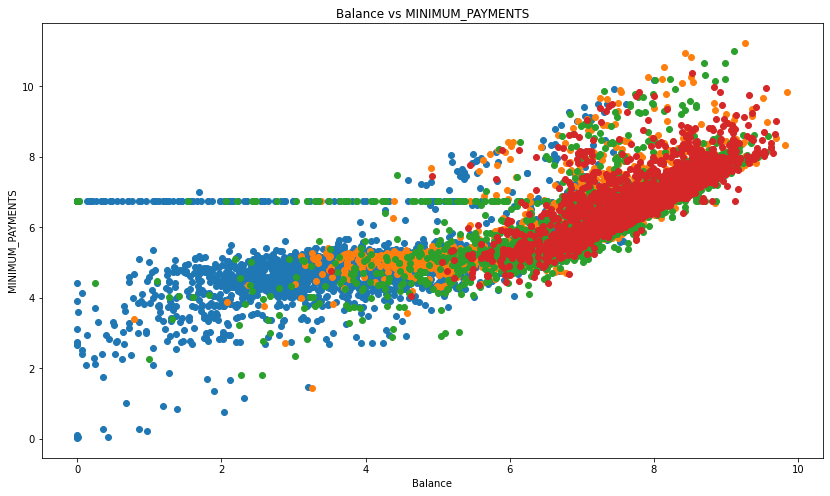

In [59]:
scatter_plot(df_cluster, "Balance", "MINIMUM_PAYMENTS")

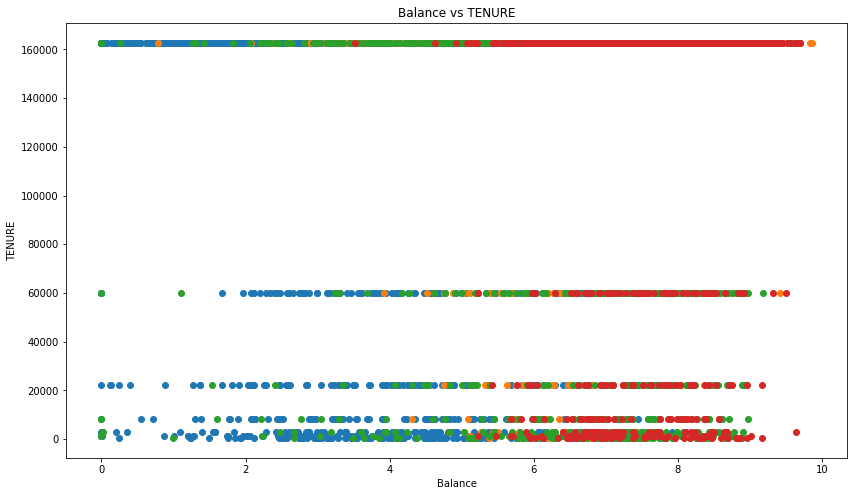

In [60]:
scatter_plot(df_cluster, "Balance", "TENURE")

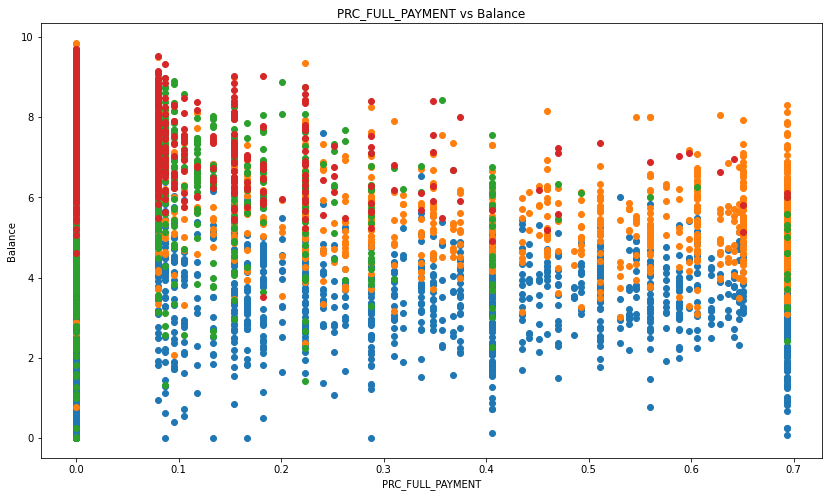

In [61]:
scatter_plot(df_cluster, "PRC_FULL_PAYMENT", "Balance")

## hierarchical

In [62]:
from scipy.cluster.hierarchy import dendrogram, linkage

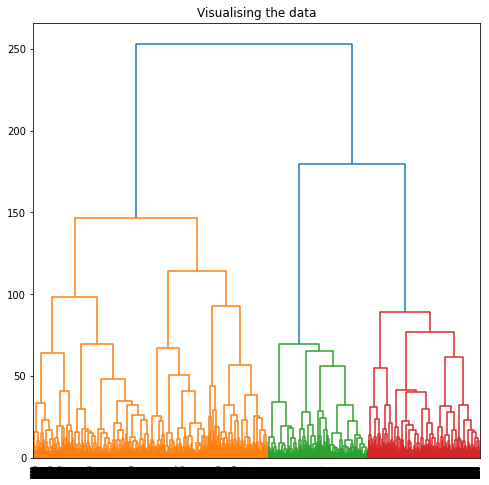

In [63]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = dendrogram((linkage(df_scaled, method ='ward')))

In [64]:
#import the necessary module
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(linkage="ward", 
                                n_clusters=4)
# #fit the model to the data
# model.fit(df_scaled)

In [65]:
df_hier = df_scaled.copy()
df_hier['cluster'] = model.fit_predict(df_scaled)

In [66]:
df_hier.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,-1.205218,-0.423694,-0.113532,-0.987090,0.394480,-0.930733,-0.806490,-0.732480,-0.707313,-0.724360,-0.810069,-0.579510,-1.447207,-0.824484,-0.853119,-0.556368,0.417185,1
1,0.948918,0.041807,-1.679855,-0.987090,-1.087454,1.528788,-1.221758,-0.732480,-0.916995,0.699592,0.784603,-1.379210,0.925998,1.065033,0.870592,0.391958,0.417185,2
2,0.824993,0.551608,0.600727,1.062022,-1.087454,-0.930733,1.269843,2.466762,-0.916995,-0.724360,-0.810069,0.487865,1.010166,-0.119300,0.416585,-0.556368,0.417185,1
3,0.624653,-1.236854,0.827499,1.265778,-1.087454,0.564372,-1.014125,-0.363042,-0.916995,-0.213583,-0.123281,-0.874655,1.010166,-4.161996,0.687847,-0.556368,0.417185,0
4,0.271260,0.551608,-0.708481,-0.114307,-1.087454,-0.930733,-1.014125,-0.363042,-0.916995,-0.724360,-0.810069,-0.874655,-1.224955,-0.064979,-0.379047,-0.556368,0.417185,1


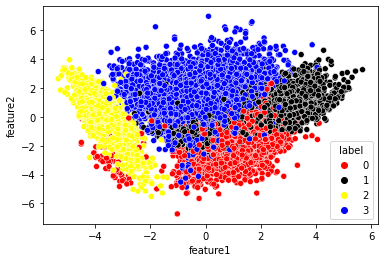

In [67]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_hier.iloc[:,:-1]) 

# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['feature1','feature2'])
pca_df['label'] = df_hier['cluster']

sns.scatterplot(x="feature1", y="feature2", hue = "label", data = pca_df, palette= ['red','black','yellow','blue'])
plt.show()

In [68]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                      init='pca').fit_transform(df_scaled)


## tsne

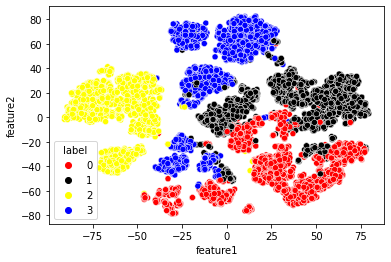

In [69]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = X_embedded, columns =['feature1','feature2'])
pca_df['label'] = df_hier['cluster']
sns.scatterplot(x="feature1", y="feature2", hue = "label", data = pca_df, palette= ['red','black','yellow','blue'])
plt.show()

# DBSCAN

In [70]:
from sklearn.cluster import DBSCAN

In [97]:
def DBSCAN_pca_vis(eps, min_samples):
    clustering = DBSCAN(eps=eps, min_samples=min_samples)
    clustering.fit(df_scaled)
    labels = clustering.labels_
    
    # concatenate the clusters labels to our original dataframe
    df_cluster = df.copy()
    df_cluster['label'] = labels
    
    # Obtain the principal components 
    pca = PCA(n_components=2)
    principal_comp = pca.fit_transform(df_scaled) 
    
    # Create a dataframe with the two components
    pca_df = pd.DataFrame(data = principal_comp, columns =['feature1','feature2'])
    pca_df['label'] = labels
    
    plt.figure(figsize=(10,10))
    sns.scatterplot(x="feature1", y="feature2", data = pca_df[pca_df['label'] != -1])
    sns.scatterplot(x="feature1", y="feature2", hue = "label", data = pca_df[pca_df['label'] == -1], palette= ['red'])
    plt.show()
    
    return df_cluster

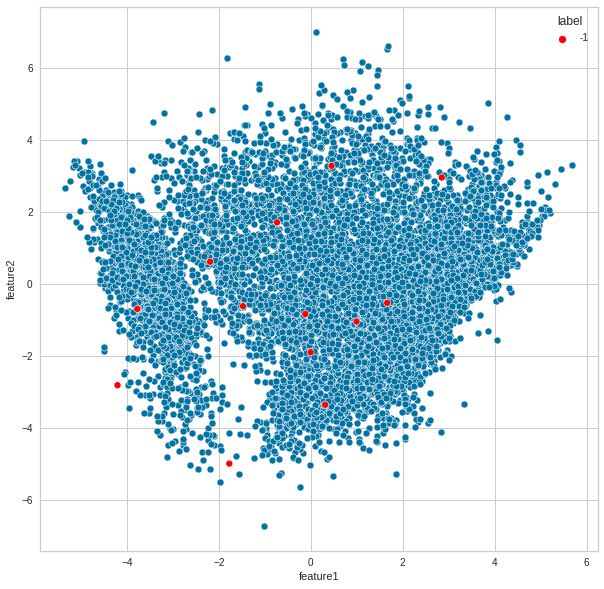

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,label
0,3.735304,2.266376,4.568506,0.000000,4.568506,0.000000,0.166667,0.000000,0.083333,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,162754.791419,0
1,8.071989,2.482065,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,162754.791419,0
2,7.822504,2.718282,6.651791,6.651791,0.000000,0.000000,1.000000,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,162754.791419,0
3,7.419183,1.889598,7.313220,7.313220,0.000000,5.331694,0.083333,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,0.000000,6.762968,0.000000,162754.791419,0
4,6.707735,2.718282,2.833213,2.833213,0.000000,0.000000,0.083333,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,162754.791419,0


In [103]:
df_cluster_dbscan = DBSCAN_pca_vis(eps=3, min_samples=5)
df_cluster_dbscan.head()

In [104]:
outliers_dbscan = df_cluster_dbscan[df_cluster_dbscan['label'] == -1]
print("number of outliers is " , len(outliers_dbscan))
outliers_dbscan

number of outliers is  13


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,label
156,8.672162,2.718282,8.157511,8.090479,5.426007,8.102935,1.000000,0.693147,0.500000,0.559616,2.772589,3.850148,8.974745,0.000000,6.762968,0.000000,162754.791419,-1
1032,7.033586,2.718282,4.464988,0.000000,4.464988,6.313691,0.583333,0.000000,0.583333,0.693147,2.639057,2.079442,7.090910,0.000000,6.762968,0.000000,162754.791419,-1
1117,0.397467,2.459603,4.804021,0.000000,4.804021,0.000000,0.200000,0.000000,0.200000,0.000000,0.000000,1.098612,9.472782,5.482647,2.955927,0.095310,22026.465795,-1
1419,0.001213,1.199396,0.000000,0.000000,0.000000,3.704025,0.000000,0.000000,0.000000,0.080042,0.693147,0.000000,8.922792,5.447089,0.110679,0.000000,162754.791419,-1
1458,1.683232,1.313542,4.877028,0.000000,5.032005,0.000000,0.083333,0.000000,0.083333,0.000000,0.000000,0.000000,9.546884,10.274705,6.996851,0.405465,162754.791419,-1
3583,0.000000,1.000000,5.831442,5.831442,0.000000,4.647601,1.000000,0.693147,0.000000,0.080042,0.693147,2.564949,8.779711,6.072877,6.762968,0.000000,162754.791419,-1
3696,8.814171,2.718282,7.435721,7.285150,5.472271,8.679683,0.500000,0.405465,0.166667,0.287682,2.397895,2.708050,8.853808,0.000000,6.762968,0.000000,403.428793,-1
4169,3.257200,2.718282,6.581471,6.581471,0.000000,2.994986,1.000000,0.693147,0.000000,0.080042,0.693147,2.564949,9.105091,6.499837,1.434594,0.000000,162754.791419,-1
6951,6.680224,2.482065,0.000000,0.000000,0.000000,8.644316,0.000000,0.000000,0.000000,0.405465,1.945910,0.000000,3.931826,8.932108,6.019227,0.367724,162754.791419,-1
7046,8.000032,2.266376,10.195620,10.185478,5.603225,0.000000,0.583333,0.405465,0.083333,0.000000,0.000000,3.526361,10.308986,10.309953,9.380488,0.559616,162754.791419,-1


# check outliers with isolation forest

In [74]:
from sklearn.ensemble import IsolationForest

In [75]:
def iso_pca_vis(n_estimators, contamination):
    clustering = IsolationForest(n_estimators=n_estimators, contamination=contamination)
    clustering.fit(df_scaled)
    labels = clustering.predict(df_scaled)
    
    # concatenate the clusters labels to our original dataframe
    df_cluster = df.copy()
    df_cluster['label'] = labels
    
    # Obtain the principal components 
    pca = PCA(n_components=2)
    principal_comp = pca.fit_transform(df_scaled) 
    
    # Create a dataframe with the two components
    pca_df = pd.DataFrame(data = principal_comp, columns =['feature1','feature2'])
    pca_df['label'] = labels
    
    plt.figure(figsize=(10,10))
    sns.scatterplot(x="feature1", y="feature2", data = pca_df[pca_df['label'] != -1])
    sns.scatterplot(x="feature1", y="feature2", hue = "label", data = pca_df[pca_df['label'] == -1], palette= ['red'])
    plt.show()
    
    return df_cluster

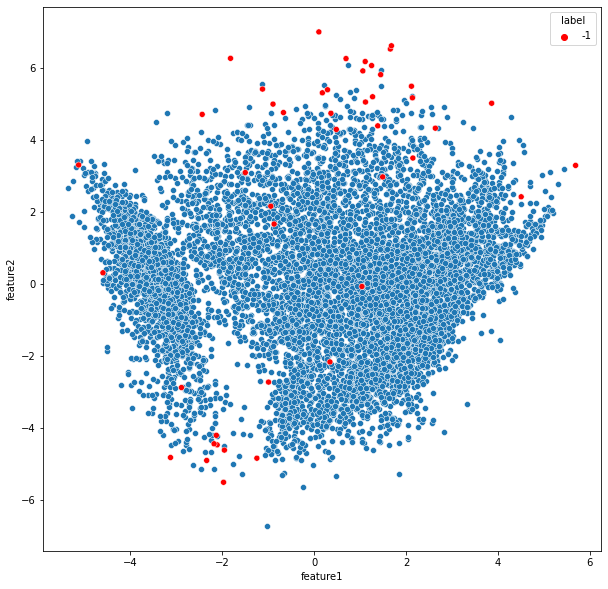

In [76]:
df_cluster_iso = iso_pca_vis(500, 0.005)

## tsne

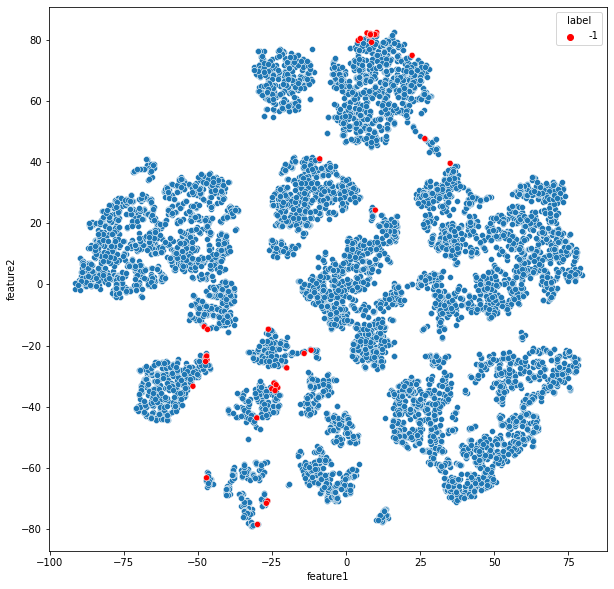

In [77]:
clustering = IsolationForest(n_estimators=500, contamination=0.005)
clustering.fit(df_scaled)
labels = clustering.predict(df_scaled)

# concatenate the clusters labels to our original dataframe
df_cluster = df.copy()
df_cluster['label'] = labels

# Obtain the principal components 
tsne = TSNE(n_components=2, learning_rate='auto',
                      init='pca')
principal_comp = tsne.fit_transform(df_scaled) 

# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['feature1','feature2'])
pca_df['label'] = labels

plt.figure(figsize=(10,10))
sns.scatterplot(x="feature1", y="feature2", data = pca_df[pca_df['label'] != -1])
sns.scatterplot(x="feature1", y="feature2", hue = "label", data = pca_df[pca_df['label'] == -1], palette= ['red'])
plt.show()

In [78]:
outliers_iso = df_cluster_iso[df_cluster_iso['label']==-1]
print("number of outliers is " , len(outliers_iso))
outliers_iso

number of outliers is  45


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,label
71,8.003504,2.482065,8.417212,7.417634,7.958640,10.214550,0.666667,0.405465,0.583333,0.606136,3.332205,3.526361,8.853808,10.248271,7.010340,0.374693,162754.791419,-1
153,9.523257,2.718282,9.189447,8.284204,8.671359,7.801983,1.000000,0.559616,1.000000,0.559616,3.295837,5.379897,9.903538,9.368908,8.706721,0.000000,162754.791419,-1
171,6.884427,2.718282,9.232332,8.873801,8.033000,7.391221,1.000000,0.693147,0.833333,0.459532,2.944439,4.875197,9.259226,9.277484,5.854043,0.559616,162754.791419,-1
263,8.956312,2.718282,9.051877,8.312322,8.403303,8.928151,1.000000,0.405465,0.833333,0.405465,2.564949,4.290459,9.210440,8.467837,8.889853,0.000000,403.428793,-1
341,7.032965,1.575456,7.717485,7.717485,0.000000,9.550312,0.333333,0.287682,0.000000,0.348307,3.044522,2.197225,8.699681,10.375040,6.010753,0.587787,162754.791419,-1
520,9.632940,2.718282,6.273443,6.273443,0.000000,8.319204,0.500000,0.405465,0.000000,0.693147,3.178054,2.397895,9.852247,7.626642,8.270459,0.000000,2980.957987,-1
550,9.354313,2.718282,10.800403,10.615512,9.021516,6.326448,1.000000,0.693147,0.916667,0.080042,0.693147,4.624973,10.021315,10.756446,7.998023,0.223144,162754.791419,-1
610,8.875752,2.718282,8.252860,7.528966,7.590049,9.603239,1.000000,0.650588,1.000000,0.650588,3.951244,3.970292,9.159152,9.783631,7.824679,0.000000,162754.791419,-1
658,8.245141,2.482065,8.704724,7.964117,8.057203,8.893007,1.000000,0.405465,1.000000,0.405465,4.143135,4.653960,8.853808,9.746006,7.634942,0.087011,162754.791419,-1
842,9.014537,2.718282,8.556072,8.294652,7.087415,9.844696,1.000000,0.451985,0.857143,0.693147,3.258097,2.772589,9.472782,9.464009,7.161098,0.182322,1096.633158,-1


## EM

In [79]:
from sklearn.mixture import GaussianMixture

In [80]:
gmm = GaussianMixture(n_components=5)

In [81]:
gmm.fit(df_scaled)

GaussianMixture(n_components=5)

In [82]:
gmm.weights_

array([0.32038235, 0.19988827, 0.15051167, 0.26439269, 0.06482502])

### since cluster 1 has low weight we could say it is the anomilies

In [83]:
df_labels_gmm = gmm.predict(df_scaled)

In [84]:
df_gmm = df_scaled.copy()
df_gmm['clusters'] = df_labels_gmm

In [85]:
df_gmm.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,-1.205218,-0.423694,-0.113532,-0.987090,0.394480,-0.930733,-0.806490,-0.732480,-0.707313,-0.724360,-0.810069,-0.579510,-1.447207,-0.824484,-0.853119,-0.556368,0.417185,1
1,0.948918,0.041807,-1.679855,-0.987090,-1.087454,1.528788,-1.221758,-0.732480,-0.916995,0.699592,0.784603,-1.379210,0.925998,1.065033,0.870592,0.391958,0.417185,0
2,0.824993,0.551608,0.600727,1.062022,-1.087454,-0.930733,1.269843,2.466762,-0.916995,-0.724360,-0.810069,0.487865,1.010166,-0.119300,0.416585,-0.556368,0.417185,3
3,0.624653,-1.236854,0.827499,1.265778,-1.087454,0.564372,-1.014125,-0.363042,-0.916995,-0.213583,-0.123281,-0.874655,1.010166,-4.161996,0.687847,-0.556368,0.417185,0
4,0.271260,0.551608,-0.708481,-0.114307,-1.087454,-0.930733,-1.014125,-0.363042,-0.916995,-0.724360,-0.810069,-0.874655,-1.224955,-0.064979,-0.379047,-0.556368,0.417185,0


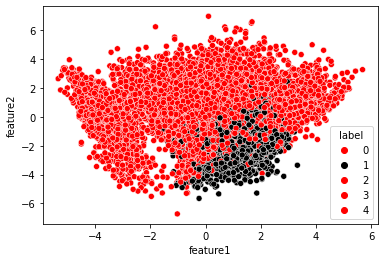

In [86]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_gmm.iloc[:,:-1]) 

# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['feature1','feature2'])
pca_df['label'] = df_labels_gmm

sns.scatterplot(x="feature1", y="feature2", hue = "label", data = pca_df, palette= ['red','black','red','red','red'])
plt.show()

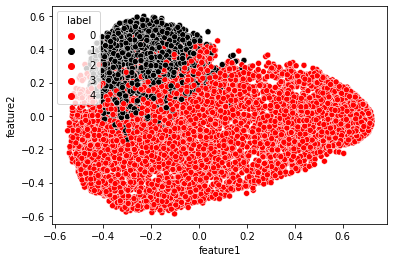

In [87]:
# Obtain the principal components 
pca = KernelPCA(n_components=2, kernel='rbf')
principal_comp = pca.fit_transform(df_gmm.iloc[:,:-1]) 

# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['feature1','feature2'])
pca_df['label'] = df_labels_gmm

sns.scatterplot(x="feature1", y="feature2", hue = "label", data = pca_df, palette=['red','black','red','red','red'])
plt.show()

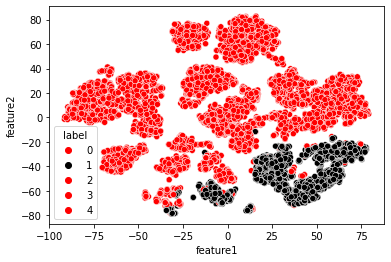

In [88]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
                      init='pca').fit_transform(df_scaled)
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = X_embedded, columns =['feature1','feature2'])
pca_df['label'] = df_labels_gmm
sns.scatterplot(x="feature1", y="feature2", hue = "label", data = pca_df, palette= ['red','black','red','red','red'])
plt.show()

# feature importance

In [89]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_scaled) 

In [90]:
df_cluster.iloc[:,:-1].columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [91]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=['pc1', 'pc2'],
    index=df_cluster.iloc[:,:-1].columns
)
loadings

,pc1,pc2
BALANCE,-0.286582,0.840126
BALANCE_FREQUENCY,0.052743,0.634473
PURCHASES,0.875166,0.238851
ONEOFF_PURCHASES,0.506164,0.430859
INSTALLMENTS_PURCHASES,0.783337,0.139378
CASH_ADVANCE,-0.714913,0.497599
PURCHASES_FREQUENCY,0.879244,0.230157
ONEOFF_PURCHASES_FREQUENCY,0.536594,0.437566
PURCHASES_INSTALLMENTS_FREQUENCY,0.749429,0.137269
CASH_ADVANCE_FREQUENCY,-0.627183,0.534924


In [92]:
loadings['sum_correlation'] = loadings['pc1'] + loadings['pc2']
loadings.sort_values('sum_correlation', ascending=False)

,pc1,pc2,sum_correlation
PURCHASES_TRX,0.903585,0.326535,1.230120
PURCHASES,0.875166,0.238851,1.114016
PURCHASES_FREQUENCY,0.879244,0.230157,1.109401
ONEOFF_PURCHASES_FREQUENCY,0.536594,0.437566,0.974160
ONEOFF_PURCHASES,0.506164,0.430859,0.937023
INSTALLMENTS_PURCHASES,0.783337,0.139378,0.922715
PURCHASES_INSTALLMENTS_FREQUENCY,0.749429,0.137269,0.886698
PAYMENTS,0.138896,0.589076,0.727972
BALANCE_FREQUENCY,0.052743,0.634473,0.687216
CREDIT_LIMIT,0.117665,0.485027,0.602692


## observed characteristics of outliers

## those who had high payment  but cash advance frequency is low(this is the frequency of paying the chase advance)
## those who made high one off purchase but had low cash advance and low cash advance transactions (could be the rich people/vip)

### low cash advance means low interest rate means low benefit for the bank 

In [93]:
df_scaled

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.205218,-0.423694,-0.113532,-0.987090,0.394480,-0.930733,-0.806490,-0.732480,-0.707313,-0.724360,-0.810069,-0.579510,-1.447207,-0.824484,-0.853119,-0.556368,0.417185
1,0.948918,0.041807,-1.679855,-0.987090,-1.087454,1.528788,-1.221758,-0.732480,-0.916995,0.699592,0.784603,-1.379210,0.925998,1.065033,0.870592,0.391958,0.417185
2,0.824993,0.551608,0.600727,1.062022,-1.087454,-0.930733,1.269843,2.466762,-0.916995,-0.724360,-0.810069,0.487865,1.010166,-0.119300,0.416585,-0.556368,0.417185
3,0.624653,-1.236854,0.827499,1.265778,-1.087454,0.564372,-1.014125,-0.363042,-0.916995,-0.213583,-0.123281,-0.874655,1.010166,-4.161996,0.687847,-0.556368,0.417185
4,0.271260,0.551608,-0.708481,-0.114307,-1.087454,-0.930733,-1.014125,-0.363042,-0.916995,-0.724360,-0.810069,-0.874655,-1.224955,-0.064979,-0.379047,-0.556368,0.417185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-1.379634,0.551608,0.266574,-0.987090,0.754107,-0.930733,1.269843,-0.732480,1.179833,-0.724360,-0.810069,0.037255,-1.447207,-0.525121,-1.731000,1.359774,-2.724049
8946,-1.568051,0.551608,0.276841,-0.987090,0.763821,-0.930733,1.269843,-0.732480,1.179833,-0.724360,-0.810069,0.037255,-1.447207,-0.628912,0.687847,-0.556368,-2.724049
8947,-1.473834,-0.349022,0.027374,-0.987090,0.527794,-0.930733,0.854576,-0.732480,0.760469,-0.724360,-0.810069,-0.074955,-1.447207,-1.391318,-1.295149,0.498161,-2.724049
8948,-1.733775,-0.349022,-1.679855,-0.987090,-1.087454,0.086038,-1.221758,-0.732480,-0.916995,0.259328,0.278464,-1.379210,-2.291713,-1.661097,-1.621633,0.498161,-2.724049


# Loan department

In [95]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4.170631,2.164036,5.578037,1.994157,4.149728,0.311247,0.536720,0.056260,0.455485,0.006273,0.051514,1.948688,7.781620,5.766990,5.155247,0.192202,137258.914618
1,6.583551,2.662980,7.415991,6.449560,5.166332,0.503583,0.842738,0.405215,0.575616,0.008837,0.078064,3.253538,8.450576,7.342385,5.992458,0.181873,155898.574295
2,7.117768,2.511344,0.915570,0.790054,0.130104,6.751790,0.025386,0.018337,0.005015,0.226983,1.638146,0.189299,7.989197,6.539282,6.292826,0.029698,133586.501429
3,7.704965,2.656628,6.692241,4.877881,4.651077,7.268842,0.677162,0.233511,0.492625,0.275441,1.945698,2.703645,8.352141,7.353800,6.821368,0.033020,140269.541554


In [96]:
cluster_centers[['BALANCE', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'CREDIT_LIMIT', 'PRC_FULL_PAYMENT']]

,BALANCE,PURCHASES_FREQUENCY,CASH_ADVANCE,CASH_ADVANCE_TRX,CREDIT_LIMIT,PRC_FULL_PAYMENT
0,4.170631,0.536720,0.311247,0.051514,7.781620,0.192202
1,6.583551,0.842738,0.503583,0.078064,8.450576,0.181873
2,7.117768,0.025386,6.751790,1.638146,7.989197,0.029698
3,7.704965,0.677162,7.268842,1.945698,8.352141,0.033020


## segments are not in same order as clusters
## *  segment 1 
    ##  high balance , high purchase frequency
    ##  low cash advance, high percentage of full payment (this means low interest)
    
## * segment 2 
    ##  high balance,low purchase freq
    ##  high cash advance, low percentage of full payment (good for the bank -> target to buy more)
    
## * segment 3 
    ## medium balance,  low cash in advance transactions
    ##  low cash advance, medium percentage of full payment (pays interest but small as cash advance is low)
    
## * segment 4 low balance, low cash advance,low purchase freq 

## outliers

## offers

### 15% -> to segment 2 to increase their purchase frequency
### 10% -> segment 3 to increase there cash advance and increase interest rate
### 5% -> segment 1
### none -> segment 4 and outliers